In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

# Group by month

In [14]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/100.csv')

df1['date'] = pd.to_datetime(df1['date'])
df1.index = df1['date']

In [15]:
df1.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon
date,,,,,,,,
1968-02-01,1968-02-01,5.9554,NaN,NaN,-29.1428,-32.9766,54.752,-117.2057
1968-02-02,1968-02-02,7.8870,NaN,NaN,-29.8786,-31.8214,54.752,-117.2057
1968-02-03,1968-02-03,4.2104,NaN,NaN,-13.9552,-36.3428,54.752,-117.2057
1968-02-04,1968-02-04,0.0000,NaN,NaN,2.4909,-30.9786,54.752,-117.2057
1968-02-05,1968-02-05,0.0000,NaN,NaN,0.6552,-24.4662,54.752,-117.2057


In [16]:
monthly = df1.resample("M", how='mean')

discharge = monthly['discharge'].fillna(method='bfill')

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


# Auto arima

In [17]:
from pmdarima.arima import auto_arima

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
m1 = auto_arima(discharge, error_action='ignore', seasonal=True, m=1)

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationa

## Model 1

In [29]:
m1 = auto_arima(discharge, start_p=6, start_q=1,
                           max_p=12, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(6, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1239.489, BIC=1282.142, Fit time=4.375 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1464.268, BIC=1472.799, Fit time=0.105 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1380.414, BIC=1397.475, Fit time=0.481 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1361.203, BIC=1378.264, Fit time=0.753 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1238.357, BIC=1285.276, Fit time=6.693 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1249.979, BIC=1292.632, Fit time=5.684 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1241.293, BIC=1292.477, Fit time=16.014 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1311.670, BIC=1350.058, Fit time=2.335 seconds
Fit ARIMA: order=(5, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1246.801, BIC=1289.454, Fit time=5.949 seconds
Fit ARIMA: order=(7, 1, 1) 

In [30]:
print(m1.aic())

1238.1103551353217


In [31]:
monthly.index

DatetimeIndex(['1968-02-29', '1968-03-31', '1968-04-30', '1968-05-31',
               '1968-06-30', '1968-07-31', '1968-08-31', '1968-09-30',
               '1968-10-31', '1968-11-30',
               ...
               '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', name='date', length=539, freq='M')

In [17]:
monthly.index[0]

Timestamp('1968-02-29 00:00:00', freq='M')

In [18]:
monthly.index[-1]

Timestamp('2012-12-31 00:00:00', freq='M')

In [19]:
2012-1968

44

In [20]:
1968+22

1990

In [21]:
train = discharge.loc[:'1990-12-31 00:00:00']
test = discharge.loc['1990-12-31 00:00:00':]

In [24]:
len(train)

275

In [25]:
len(test)

265

In [32]:
m1.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(6, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [33]:
future_forecast = m1.predict(n_periods=265)

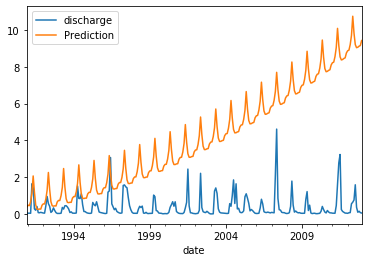

In [34]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test, future_forecast], axis=1).plot()

## Model 2

In [18]:
m2 = auto_arima(discharge, error_action='ignore', seasonal=True, m=12, trace=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=1265.683, BIC=1299.986, Fit time=1.757 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1515.533, BIC=1524.109, Fit time=0.119 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1387.467, BIC=1404.618, Fit time=0.259 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1407.633, BIC=1424.785, Fit time=0.255 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1291.040, BIC=1321.055, Fit time=1.411 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 12); AIC=1266.861, BIC=1305.452, Fit time=4.669 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1264.419, BIC=1294.434, Fit time=1.464 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1259.923, BIC=1285.650, Fit time=1.274 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1260.594, BIC=1282.033, Fit time=1.172 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 0, 12); AIC=1245.232, BIC=1275.247, Fit time=1.356 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1291.090, BIC=1312.530, Fit time=0.589 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationa

Fit ARIMA: order=(2, 1, 4) seasonal_order=(1, 0, 0, 12); AIC=1237.171, BIC=1275.762, Fit time=1.915 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_order=(0, 0, 0, 12); AIC=1351.291, BIC=1385.593, Fit time=0.688 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 4) seasonal_order=(2, 0, 0, 12); AIC=1238.516, BIC=1281.394, Fit time=5.362 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationa

Fit ARIMA: order=(2, 1, 4) seasonal_order=(1, 0, 1, 12); AIC=1238.593, BIC=1281.472, Fit time=2.436 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 4) seasonal_order=(2, 0, 1, 12); AIC=1240.445, BIC=1287.611, Fit time=4.916 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting 

Fit ARIMA: order=(1, 1, 4) seasonal_order=(1, 0, 0, 12); AIC=1247.546, BIC=1281.849, Fit time=1.561 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 1, 4) seasonal_order=(1, 0, 0, 12); AIC=1250.372, BIC=1293.251, Fit time=2.144 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 0, 0, 12); AIC=1246.749, BIC=1281.052, Fit time=1.599 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 5) seasonal_order=(1, 0, 0, 12); AIC=1233.522, BIC=1276.401, Fit time=2.007 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 5) seasonal_order=(0, 0, 0, 12); AIC=1351.919, BIC=1390.509, Fit time=1.181 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 5) seasonal_order=(2, 0, 0, 12); AIC=1234.876, BIC=1282.042, Fit time=5.003 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 5) seasonal_order=(1, 0, 1, 12); AIC=1234.208, BIC=1281.374, Fit time=3.237 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 5) seasonal_order=(2, 0, 1, 12); AIC=1235.535, BIC=1286.989, Fit time=5.533 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 1, 5) seasonal_order=(1, 0, 0, 12); AIC=1247.832, BIC=1286.422, Fit time=1.797 seconds
Fit ARIMA: order=(3, 1, 5) seasonal_order=(1, 0, 0, 12); AIC=1235.600, BIC=1282.767, Fit time=2.179 seconds
Total fit time: 55.911 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
print(m2.aic())

1233.522021041984


In [25]:
m2.fit(train)

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [46]:
future_forecast = m2.predict(n_periods=265)

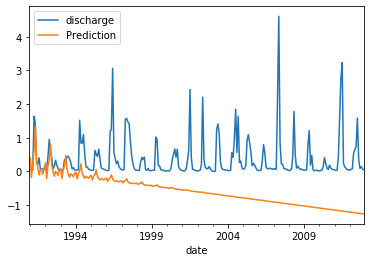

In [47]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test, future_forecast], axis=1).plot()

In [26]:
future_forecast = m2.predict(n_periods=len(train))

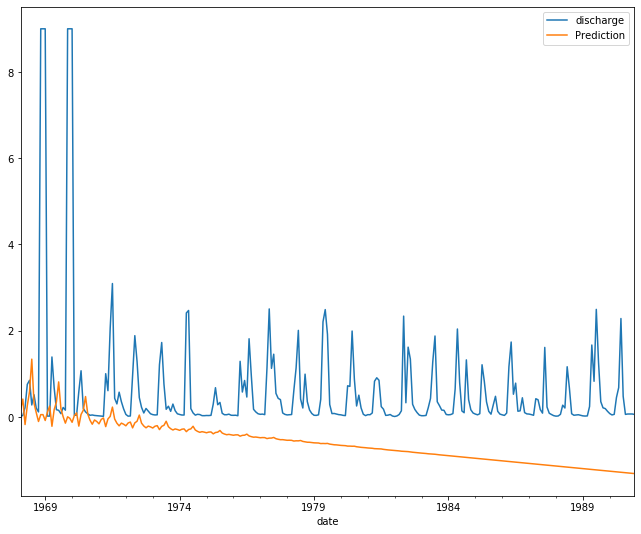

In [27]:
future_forecast = pd.DataFrame(future_forecast, index = train.index, columns=['Prediction'])
pd.concat([train, future_forecast], axis=1).plot()

# Manual ARIMA

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
# train up to date in 1921
model = ARIMA(discharge.loc[:'1990-12-31 00:00:00'], order=(12,1,0)) 
# order=(p,d,q)  = (seasonality, trend, and noise)
# p: autoregressive
# d: differencing
# q: moving average

model_fit = model.fit(disp=0)

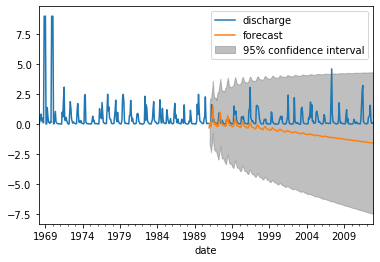

In [41]:
fig, ax = plt.subplots()
ax = discharge.plot(ax=ax)
fig = model_fit.plot_predict('1990-12-31 00:00:00', '2012-12-31 00:00:00', dynamic=True, ax=ax, plot_insample=False)
plt.show()

# Analysis

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

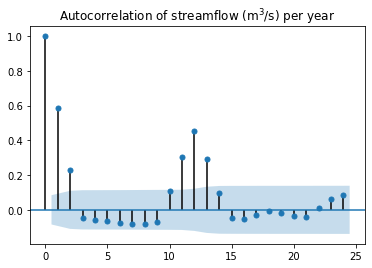

In [50]:
plot_acf(discharge, lags=24, title="Autocorrelation of streamflow (m$^3$/s) per year")
plt.show()

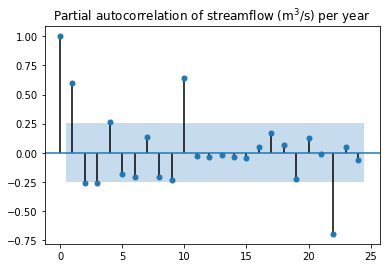

In [54]:
plot_pacf(discharge[0:12*5], lags=24, title="Partial autocorrelation of streamflow (m$^3$/s) per year")
plt.show()

In [6]:
import statsmodels.api as sm
from pylab import rcParams

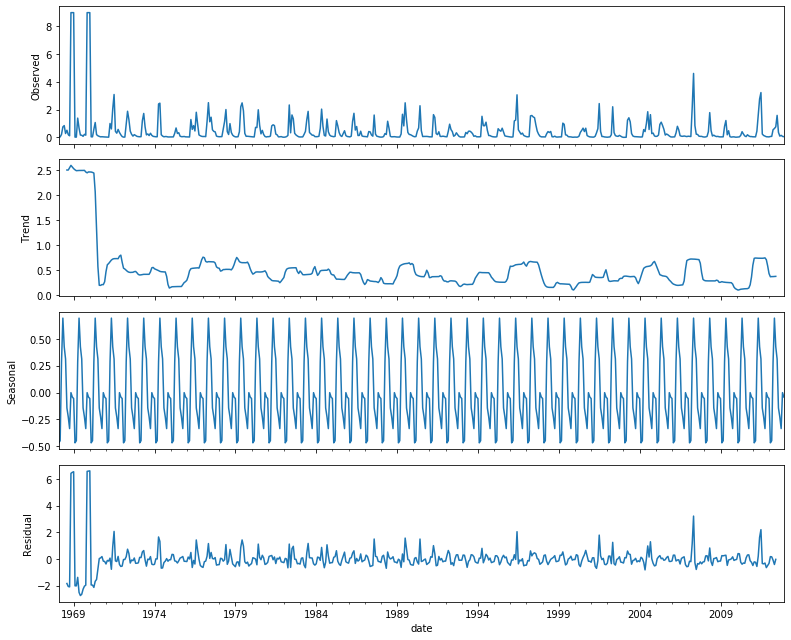

In [11]:
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(discharge,freq=12) # monthly frequency
figure = decomposed.plot()
plt.show()